## Importiert Module


In [1]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa 
import librosa.display 
import numpy as np
import tqdm 
import os
import pandas as pd

##  Lädt eine Audiodatei

In [2]:
filename ='Strassenmusik.wav'

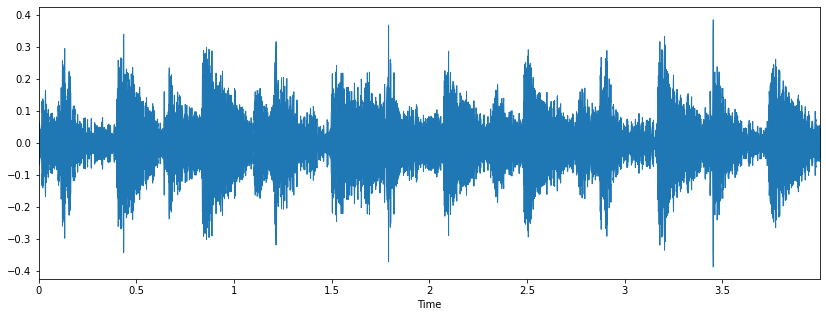

In [3]:
# Plottet die WAV-Datei 
plt.figure(figsize=(14,5))
librosa_audio_data,librosa_sample_rate=librosa.load(filename) # mono-signal
librosa.display.waveplot(librosa_audio_data, sr=librosa_sample_rate)
ipd.Audio(filename)

## Lädt das Datenset

In [4]:
audio_dataset_path='UrbanSounds/UrbanSound8K/audio'
metadata= pd.read_csv('UrbanSounds/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [5]:
##Check if dataset us imbalanced
metadata['class'].value_counts()

jackhammer          1000
drilling            1000
engine_idling       1000
street_music        1000
dog_bark            1000
air_conditioner     1000
children_playing    1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

C:\Users\fabia\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

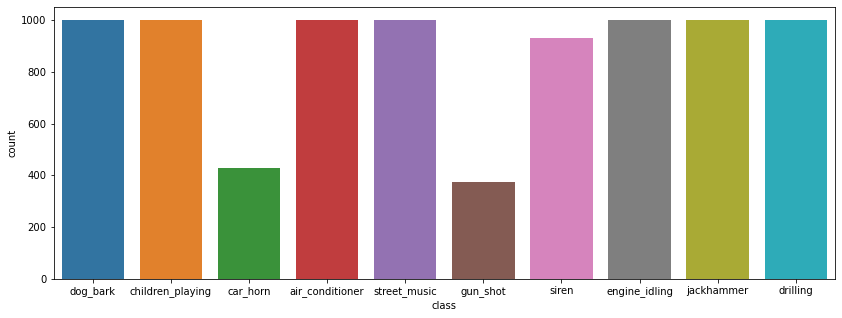

In [6]:
import seaborn as sns
plt.figure(figsize=(14,5))
sns.countplot(metadata['class'])

In [7]:
##  Extract Features 
## MfCC extrahiert verschiedene Features aus den Audiodateien

In [8]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [9]:
mfccs

array([[-270.65097   , -276.71616   , -297.94598   , ..., -246.74577   ,
        -202.53815   , -217.36192   ],
       [ 140.31265   ,  151.57663   ,  154.47443   , ...,  120.28755   ,
          97.74144   ,  100.21867   ],
       [   2.0731583 ,    0.5562018 ,   -3.5554063 , ...,   -0.5797465 ,
         -13.409763  ,  -15.888409  ],
       ...,
       [   3.3987389 ,    5.0661907 ,    4.0132885 , ...,    4.6896367 ,
           4.1718106 ,    6.1742716 ],
       [   6.294203  ,    7.2963815 ,    8.059784  , ...,   -3.9782972 ,
          -4.6594777 ,    0.52659166],
       [  -6.362739  ,   -5.5755525 ,   -2.292389  , ...,    3.3489723 ,
           5.3940625 ,    7.1622834 ]], dtype=float32)

In [10]:
def features_extractor(file):
    audio, sample_rate= librosa.load(file_name, res_type ='kaiser_fast')
    mfccs_features= librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features= np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [11]:
## Iterate through every audio file and extract features using Mel-Frequency Cepstral Coefficients
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"])) ##folder subfolder filename
    final_class_labels=row["class"] # holt Klasse
    data=features_extractor(file_name) # Klasse in Feature_exctractor
    extracted_features.append([data,final_class_labels])

3555it [03:31, 17.31it/s]C:\Users\fabia\anaconda3\envs\tensorflow\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8325it [08:04, 23.22it/s]C:\Users\fabia\anaconda3\envs\tensorflow\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Users\fabia\anaconda3\envs\tensorflow\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [08:27, 17.22it/s]


In [12]:
#converting extracted features to Pandas dataframe 
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()


,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01073, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [13]:
## Split the dataset into independent datasets
X=np.array(extracted_features_df['feature'].tolist())
Y=np.array(extracted_features_df['class'].tolist())

In [14]:
##label Encoding 
#Y=np.array(pd.get_dummies(Y))
from tensorflow.keras.utils import to_categorical 
from sklearn.preprocessing import LabelEncoder 
labelencoder = LabelEncoder()
Y=to_categorical(labelencoder.fit_transform(Y)) # converts classes into numbers

In [15]:
Y.shape

(8732, 10)

In [16]:
##Train Test Split 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [17]:
X_train.shape

(6985, 40)

In [18]:
X_test.shape

(1747, 40)

In [19]:
Y_train.shape

(6985, 10)

In [20]:
Y_test.shape

(1747, 10)

# Model Creation


In [21]:
import tensorflow as tf
print (tf.__version__)

2.3.0


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [23]:
#number of classes 
num_labels=Y.shape[1]

In [24]:
model = Sequential()
## first layer
model.add(Dense(256,input_shape=(40,))) ## 40 features wurden extrahiert 
model.add(Activation('relu'))
model.add(Dropout(0.3))

##second layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

##third layer 
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
##fourth layer 
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

##final layer 
model.add(Dense(num_labels)) 
model.add(Activation('softmax'))



In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               10496     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1

In [26]:
model.compile(loss='categorical_crossentropy',metrics='accuracy',optimizer='adam')

## Training of the Model


In [27]:

from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history=model.fit(X_train, Y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, Y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
212/219 [============================>.] - ETA: 0s - loss: 4.6348 - accuracy: 0.1431
Epoch 00001: val_loss improved from inf to 2.24173, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 9ms/step - loss: 4.5688 - accuracy: 0.1432 - val_loss: 2.2417 - val_accuracy: 0.1454
Epoch 2/200
218/219 [============================>.] - ETA: 0s - loss: 2.2315 - accuracy: 0.2014
Epoch 00002: val_loss improved from 2.24173 to 2.08826, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 8ms/step - loss: 2.2315 - accuracy: 0.2013 - val_loss: 2.0883 - val_accuracy: 0.2650
Epoch 3/200
217/219 [============================>.] - ETA: 0s - loss: 2.0926 - accuracy: 0.2415
Epoch 00003: val_loss improved from 2.08826 to 1.88568, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 8ms/step - loss: 2.0930 - accuracy: 0.2411 - val_loss: 1.8857 - val_accu

Epoch 26/200
216/219 [============================>.] - ETA: 0s - loss: 0.7193 - accuracy: 0.7640
Epoch 00026: val_loss improved from 0.59354 to 0.57923, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 7ms/step - loss: 0.7199 - accuracy: 0.7642 - val_loss: 0.5792 - val_accuracy: 0.8082
Epoch 27/200
219/219 [==============================] - ETA: 0s - loss: 0.6975 - accuracy: 0.7725
Epoch 00027: val_loss did not improve from 0.57923
219/219 [==============================] - 2s 7ms/step - loss: 0.6975 - accuracy: 0.7725 - val_loss: 0.5878 - val_accuracy: 0.8203
Epoch 28/200
219/219 [==============================] - ETA: 0s - loss: 0.6955 - accuracy: 0.7749
Epoch 00028: val_loss did not improve from 0.57923
219/219 [==============================] - 2s 7ms/step - loss: 0.6955 - accuracy: 0.7749 - val_loss: 0.6024 - val_accuracy: 0.8191
Epoch 29/200
209/219 [===========================>..] - ETA: 0s - loss: 0.6849 - accuracy: 0.7832
Ep

Epoch 53/200
217/219 [============================>.] - ETA: 0s - loss: 0.5099 - accuracy: 0.8353
Epoch 00053: val_loss did not improve from 0.41829
219/219 [==============================] - 2s 7ms/step - loss: 0.5099 - accuracy: 0.8351 - val_loss: 0.4359 - val_accuracy: 0.8643
Epoch 54/200
216/219 [============================>.] - ETA: 0s - loss: 0.5450 - accuracy: 0.8307
Epoch 00054: val_loss did not improve from 0.41829
219/219 [==============================] - 1s 7ms/step - loss: 0.5427 - accuracy: 0.8314 - val_loss: 0.4416 - val_accuracy: 0.8666
Epoch 55/200
212/219 [============================>.] - ETA: 0s - loss: 0.5083 - accuracy: 0.8405
Epoch 00055: val_loss did not improve from 0.41829
219/219 [==============================] - 2s 7ms/step - loss: 0.5097 - accuracy: 0.8399 - val_loss: 0.4635 - val_accuracy: 0.8563
Epoch 56/200
211/219 [===========================>..] - ETA: 0s - loss: 0.4900 - accuracy: 0.8454
Epoch 00056: val_loss did not improve from 0.41829
219/219 [==

216/219 [============================>.] - ETA: 0s - loss: 0.4641 - accuracy: 0.8595
Epoch 00081: val_loss improved from 0.38978 to 0.38809, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 7ms/step - loss: 0.4648 - accuracy: 0.8587 - val_loss: 0.3881 - val_accuracy: 0.8907
Epoch 82/200
211/219 [===========================>..] - ETA: 0s - loss: 0.4463 - accuracy: 0.8624
Epoch 00082: val_loss did not improve from 0.38809
219/219 [==============================] - 2s 7ms/step - loss: 0.4502 - accuracy: 0.8607 - val_loss: 0.3902 - val_accuracy: 0.8769
Epoch 83/200
215/219 [============================>.] - ETA: 0s - loss: 0.4742 - accuracy: 0.8573
Epoch 00083: val_loss did not improve from 0.38809
219/219 [==============================] - 2s 7ms/step - loss: 0.4760 - accuracy: 0.8564 - val_loss: 0.4047 - val_accuracy: 0.8781
Epoch 84/200
219/219 [==============================] - ETA: 0s - loss: 0.4684 - accuracy: 0.8565
Epoch 00084: va

Epoch 110/200
219/219 [==============================] - ETA: 0s - loss: 0.4279 - accuracy: 0.8727
Epoch 00110: val_loss did not improve from 0.37015
219/219 [==============================] - 2s 7ms/step - loss: 0.4279 - accuracy: 0.8727 - val_loss: 0.3844 - val_accuracy: 0.8907
Epoch 111/200
215/219 [============================>.] - ETA: 0s - loss: 0.4284 - accuracy: 0.8772
Epoch 00111: val_loss did not improve from 0.37015
219/219 [==============================] - 2s 7ms/step - loss: 0.4280 - accuracy: 0.8770 - val_loss: 0.3944 - val_accuracy: 0.8861
Epoch 112/200
215/219 [============================>.] - ETA: 0s - loss: 0.4576 - accuracy: 0.8685
Epoch 00112: val_loss did not improve from 0.37015
219/219 [==============================] - 2s 7ms/step - loss: 0.4562 - accuracy: 0.8683 - val_loss: 0.4028 - val_accuracy: 0.8918
Epoch 113/200
217/219 [============================>.] - ETA: 0s - loss: 0.4260 - accuracy: 0.8776
Epoch 00113: val_loss did not improve from 0.37015
219/219

Epoch 139/200
215/219 [============================>.] - ETA: 0s - loss: 0.4450 - accuracy: 0.8772
Epoch 00139: val_loss did not improve from 0.36119
219/219 [==============================] - 2s 8ms/step - loss: 0.4447 - accuracy: 0.8769 - val_loss: 0.4079 - val_accuracy: 0.8890
Epoch 140/200
218/219 [============================>.] - ETA: 0s - loss: 0.4201 - accuracy: 0.8740
Epoch 00140: val_loss did not improve from 0.36119
219/219 [==============================] - 2s 9ms/step - loss: 0.4209 - accuracy: 0.8740 - val_loss: 0.3810 - val_accuracy: 0.8958
Epoch 141/200
218/219 [============================>.] - ETA: 0s - loss: 0.4137 - accuracy: 0.8749
Epoch 00141: val_loss did not improve from 0.36119
219/219 [==============================] - 2s 8ms/step - loss: 0.4138 - accuracy: 0.8749 - val_loss: 0.3900 - val_accuracy: 0.8941
Epoch 142/200
219/219 [==============================] - ETA: 0s - loss: 0.4153 - accuracy: 0.8789
Epoch 00142: val_loss did not improve from 0.36119
219/219

Epoch 168/200
218/219 [============================>.] - ETA: 0s - loss: 0.4075 - accuracy: 0.8817
Epoch 00168: val_loss did not improve from 0.33177
219/219 [==============================] - 2s 7ms/step - loss: 0.4077 - accuracy: 0.8816 - val_loss: 0.3710 - val_accuracy: 0.8918
Epoch 169/200
212/219 [============================>.] - ETA: 0s - loss: 0.3986 - accuracy: 0.8869
Epoch 00169: val_loss did not improve from 0.33177
219/219 [==============================] - 2s 7ms/step - loss: 0.3996 - accuracy: 0.8875 - val_loss: 0.3698 - val_accuracy: 0.8918
Epoch 170/200
215/219 [============================>.] - ETA: 0s - loss: 0.4192 - accuracy: 0.8859
Epoch 00170: val_loss did not improve from 0.33177
219/219 [==============================] - 2s 7ms/step - loss: 0.4199 - accuracy: 0.8859 - val_loss: 0.4000 - val_accuracy: 0.8907
Epoch 171/200
215/219 [============================>.] - ETA: 0s - loss: 0.4062 - accuracy: 0.8808
Epoch 00171: val_loss did not improve from 0.33177
219/219

214/219 [============================>.] - ETA: 0s - loss: 0.3514 - accuracy: 0.8989
Epoch 00197: val_loss did not improve from 0.33177
219/219 [==============================] - 2s 7ms/step - loss: 0.3560 - accuracy: 0.8976 - val_loss: 0.3787 - val_accuracy: 0.8907
Epoch 198/200
218/219 [============================>.] - ETA: 0s - loss: 0.3769 - accuracy: 0.8949
Epoch 00198: val_loss did not improve from 0.33177
219/219 [==============================] - 2s 10ms/step - loss: 0.3765 - accuracy: 0.8951 - val_loss: 0.3632 - val_accuracy: 0.9044
Epoch 199/200
212/219 [============================>.] - ETA: 0s - loss: 0.4099 - accuracy: 0.8827
Epoch 00199: val_loss did not improve from 0.33177
219/219 [==============================] - 2s 9ms/step - loss: 0.4042 - accuracy: 0.8846 - val_loss: 0.4063 - val_accuracy: 0.8867
Epoch 200/200
218/219 [============================>.] - ETA: 0s - loss: 0.3925 - accuracy: 0.8892 ETA: 0s - loss: 0.3815 - accuracy
Epoch 00200: val_loss did not improve

In [28]:
test_accuracy=model.evaluate(X_test,Y_test,verbose=0)
print(test_accuracy[1])

0.8935317397117615


In [29]:
#plot a lerning curve
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

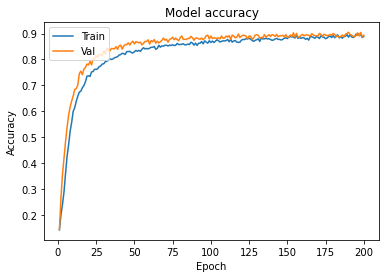

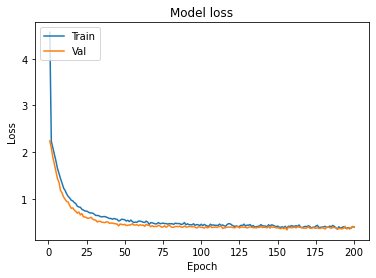

In [30]:
plot_learningCurve(history,200)

In [31]:
filename ='Strassenmusik.wav'
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict_classes(prediction_feature)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1], dtype=int64)

In [32]:
class_names=metadata['class'].unique()

## Testing Audio Data 

In [33]:
filename="engine.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
# 1 Reihe mit 40 features
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) #class name
prediction_class

[-7.99250717e+01  1.60722977e+02 -1.07795877e+01  4.10786896e+01
 -1.57033646e+00  1.29326735e+01 -1.48972511e+01  1.43354044e+01
 -1.35456982e+01  7.11026955e+00 -1.38318815e+01  1.24413719e+01
 -4.60338974e+00  5.58103800e+00 -4.02016306e+00  5.15708685e+00
 -9.79691315e+00 -1.73068416e+00 -5.57689381e+00  2.76028085e+00
 -3.90273666e+00  4.48280430e+00 -7.91124725e+00 -9.92565989e-01
 -2.51874089e+00 -1.36649704e+00 -7.73123169e+00 -5.99700403e+00
 -3.42899084e-01  1.88976359e+00 -4.00829411e+00 -3.80479693e+00
  9.75557446e-01 -1.52044821e+00  1.99816063e-01  2.17270851e+00
 -9.54267904e-02 -2.28534389e+00 -9.40690398e-01  2.93925476e+00]
[[-7.99250717e+01  1.60722977e+02 -1.07795877e+01  4.10786896e+01
  -1.57033646e+00  1.29326735e+01 -1.48972511e+01  1.43354044e+01
  -1.35456982e+01  7.11026955e+00 -1.38318815e+01  1.24413719e+01
  -4.60338974e+00  5.58103800e+00 -4.02016306e+00  5.15708685e+00
  -9.79691315e+00 -1.73068416e+00 -5.57689381e+00  2.76028085e+00
  -3.90273666e+00  

array(['air_conditioner'], dtype='<U16')

## Confusion Matrix


In [34]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


In [35]:
Y_test=np.argmax(Y_test, axis=1)

In [36]:
y_pred = model.predict_classes(X_test)

In [37]:
y_pred.size

1747

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

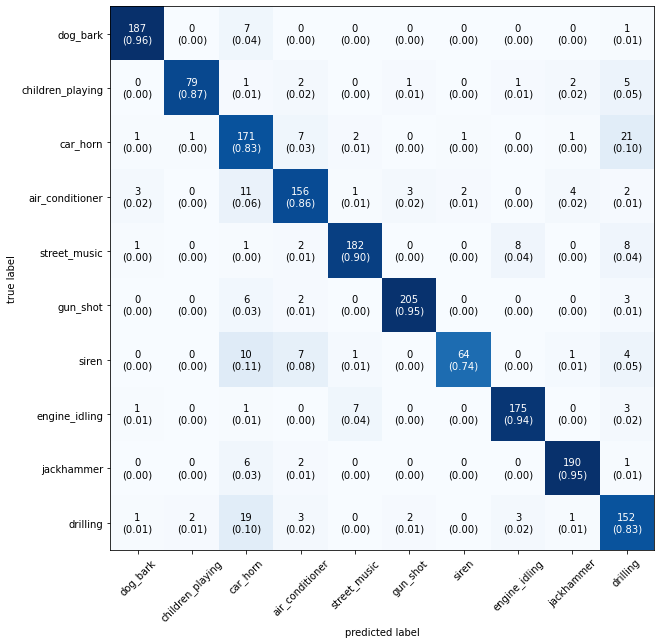

In [38]:
mat = confusion_matrix(Y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=class_names, show_normed=True, figsize=(10,10))
